# Working with tabular data

In the last class, we discussed how to work with numerical data through arrays and matrices in cases when *all the data were of the same type*. You encounter this often, so `numpy` is a powerful tool for working with such homogeneous data (data of the same type) and in such cases is often the preferred tool if you want to do numeric computations because of its speed. However, there are a number of frequently encountered situations in which `numpy` tools may not be ideal and where instead the `pandas` library may be best. These include:

1. If you do not have purely numerical data (i.e. if your data are heterogeneous), and therefore have a mix of data types, `numpy` may not be appropriate, while `pandas` can easily handle and analyze mixed data types
2. If you have tabular data, `pandas` makes life much easier to **describe**, **summarize**, **query**, and **visualize** the data than the equivalent processes with `numpy`.

## Mixed data types

Often times our data are of mixed types (e.g. integers and strings). This happens all the time. Imagine that you are collecting basic medical information from a patient. You may ask for height and weight (numerical, floating point numbers), age (integer), and blood type (categorical, string). While numpy can store these together in an array, there's not much you're going to be able to do with it computationally. Consider the following example where `numpy` throws an error:

In [1]:
import numpy as np

a = np.array([6.1, 150.0, 25, "A-"])
b = np.array([5.6, 122.0, 29, "B+"])
c = a + b

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

`pandas`, on the other hand, doesn't have any problem with mixed data types, on the other hand. It will use the appropriate operation for each data type, adding the numbers and concatenating the strings:

In [2]:
import pandas as pd

a = pd.Series([6.1, 150.0, 25, "A-"])
b = pd.Series([5.6, 122.0, 29, "B+"])
c = a + b
c

0     11.7
1    272.0
2       54
3     A-B+
dtype: object

While we will see how `pandas` ability to use mixed types really shines later in this lesson, let's also take a look at some motivating examples of what makes `DataFrames` so useful

## A hierarchy of data types: from lists to `numpy` arrays to `pandas` Series and DataFrames

We've encountered a few data types already in Python including lists and dictionaries, and more recently `numpy` arrays. Numpy arrays were essentially ways of creating 1, 2, or N-dimensional matrices and the computational tools to work with them efficiently. As a practice, it's best to use the simplest tool for the job. If all we need is a collection and we're not going to perform much computation on it, lists and dictionaries may be just fine. If we need to perform computation, then using the `numpy` arrays may make more sense. In this section, we're introducing `pandas` objects/data types including the series and the dataframe. We can think of a `pandas` series as a 1-dimensional numpy array with more functionality for selecting and querying the data. Data frames are then a collection of series with even more querying tools build into the objects themselves.

## Effectively working with tabular data

Let's walk through 3 examples of what you can do easily with `pandas` that can be rather complicated without it:

1. Quickly reading your data into a structured tabular form 
2. Quickly describe/summarize your data
3. Quickly querying your dataset
4. Quickly plotting your data

### Example 1: Quickly reading your data into a structured tabular form

Using the convenient `pandas` methods that hide away the tricky bits, loading in tabular data is trivially easy. Let's load in a dataset to demonstrate (we'll talk more about how these work throughout this week):

In [5]:
import pandas as pd

smallworld = pd.read_csv("../Example_data/world-very-small.csv")
smallworld

,country,region,gdppcap08,polityIV
0,Brazil,S. America,10296,18
1,Germany,W. Europe,35613,20
2,Mexico,N. America,14495,18
3,Mozambique,Africa,855,16
4,Russia,C&E Europe,16139,17
5,Ukraine,C&E Europe,7271,16


It really doesn't get much easier than that. We have text content (under 'country' and 'region') and numerical content ('gdp_per_capita_2008') and column headings are even included!

### Example 2: Quickly describe / summarize your data

With the use of a single `pandas` method, we can summarize the statistics of any fully-numerical columns of data:

In [6]:
smallworld.describe()


,gdp_per_capita_2008
count,6.000000
mean,14111.500000
std,11863.031683
min,855.000000
25%,8027.250000
50%,12395.500000
75%,15728.000000
max,35613.000000


### Example 3 Quickly querying your data

Not only can we load and describe our data quickly, but we can query our data quickly, too. Let's say we wanted to find the countries on the list with per-capita GDP below $10,000. This also becomes extremely simple:


In [6]:
smallworld.loc[smallworld.gdppcap08 < 10000]


,country,region,gdppcap08,polityIV
3,Mozambique,Africa,855,16
5,Ukraine,C&E Europe,7271,16


### Example 4: Quickly plotting your data

And if you want/need a quick look at your data, plotting is also extremely straightforward with `pandas` as it builds on the `matplotlib` ecosystem for plotting. Let's create a bar plot of the GDP per capita for each of the countries in our list:

<AxesSubplot:xlabel='country'>

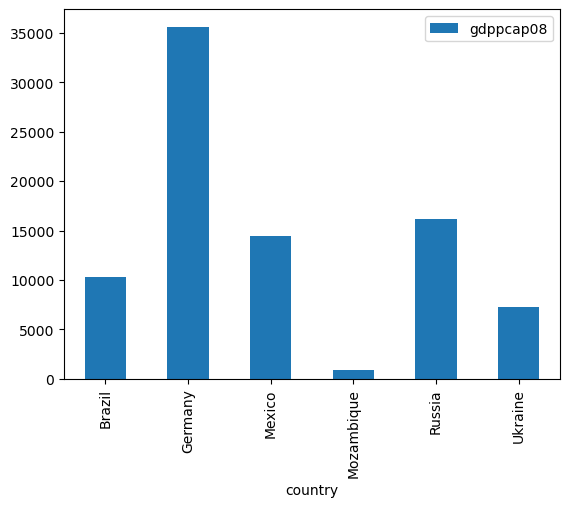

In [7]:
smallworld.plot.bar(x="country", y="gdppcap08")

### Drawbacks of `pandas`

Despite its many advantages, and as with all tools, `pandas` also has its drawbacks. First of all, the syntax of `pandas` is a bit different from what we've discussed previously with base Python and with `numpy`, making it a bit challenging to learn. Personally, I still find myself regularly consulting the documentation for `pandas` when I'm using a method I haven't used in awhile. The other drawback is that `pandas` is particularly well-designed for 1D series/arrays and 2D matrices. It's not suitable for handling 3D or N-D matrices (where N > 3). In such cases `numpy` would be preferred, or the higher dimensional analogue of pandas, [xarray](https://docs.xarray.dev/en/stable/).